# Logistic Regression
### Predicting if 2021 men's college basketball teams made the NCAA tournament

## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## importing dataset

In [2]:
ds=pd.read_csv('CBB.csv')

## Dataset Preprocessing

In [3]:
ds.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,NCAA_T,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,Michigan,B10,24,20,118.1,91.1,0.9521,54.9,44.9,16.3,...,53.3,42.3,38.7,33.5,66.9,7.2,1,NaN,NaN,NaN
1,Baylor,B12,24,22,123.2,94.5,0.9548,57.5,49.1,17.6,...,54.1,48.1,41.8,34.0,68.8,6.6,1,NaN,NaN,NaN
2,Illinois,B10,29,23,117.7,90.4,0.9539,55.6,46.6,18.2,...,55.3,45.4,37.6,32.7,70.7,8.9,1,NaN,NaN,NaN
3,Gonzaga,WCC,26,26,125.4,89.8,0.9791,61.0,47.5,16.1,...,64.0,46.8,36.5,32.5,74.6,8.5,1,NaN,NaN,NaN
4,Iowa,B10,29,21,123.5,95.7,0.9491,54.6,48.3,13.3,...,52.4,45.8,38.6,34.8,70.0,5.6,1,NaN,NaN,NaN


In [4]:
# dropping unnamed columns and team name
ds = ds.drop(['TEAM','Unnamed: 22','Unnamed: 23','Unnamed: 24'], axis=1)

ds.to_csv('new_file.csv', index=False)

## exploratory anlysis

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CONF     347 non-null    object 
 1   G        347 non-null    int64  
 2   W        347 non-null    int64  
 3   ADJOE    347 non-null    float64
 4   ADJDE    347 non-null    float64
 5   BARTHAG  347 non-null    float64
 6   EFG_O    347 non-null    float64
 7   EFG_D    347 non-null    float64
 8   TOR      347 non-null    float64
 9   TORD     347 non-null    float64
 10  ORB      347 non-null    float64
 11  DRB      347 non-null    float64
 12  FTR      347 non-null    float64
 13  FTRD     347 non-null    float64
 14  2P_O     347 non-null    float64
 15  2P_D     347 non-null    float64
 16  3P_O     347 non-null    float64
 17  3P_D     347 non-null    float64
 18  ADJ_T    347 non-null    float64
 19  WAB      347 non-null    float64
 20  NCAA_T   347 non-null    int64  
dtypes: float64(17), 

In [6]:
ds.isnull().sum()

CONF       0
G          0
W          0
ADJOE      0
ADJDE      0
BARTHAG    0
EFG_O      0
EFG_D      0
TOR        0
TORD       0
ORB        0
DRB        0
FTR        0
FTRD       0
2P_O       0
2P_D       0
3P_O       0
3P_D       0
ADJ_T      0
WAB        0
NCAA_T     0
dtype: int64

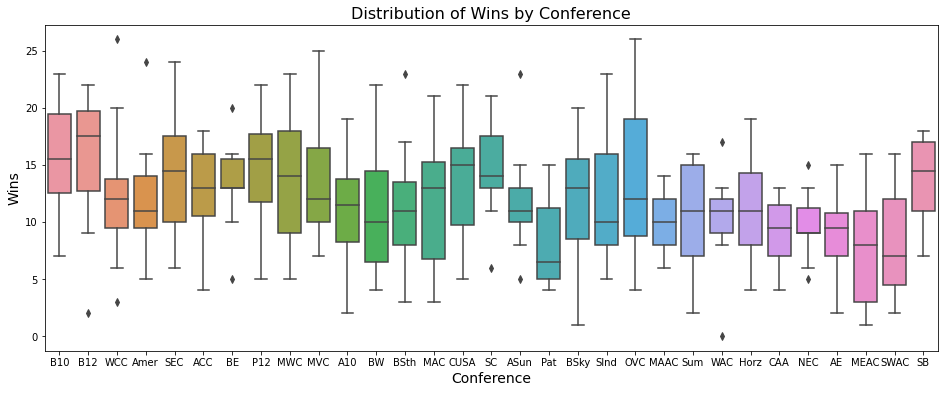

In [7]:
fig, ax = plt.subplots(figsize=(16,6))
sns.boxplot(x='CONF', y='W', data=ds, ax=ax)
ax.set_xlabel('Conference', fontsize=14)
ax.set_ylabel('Wins', fontsize=14)
ax.set_title('Distribution of Wins by Conference', fontsize=16)
plt.show()

C:\Users\DIXIES PC CUSTOMS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ADJOE', ylabel='Density'>

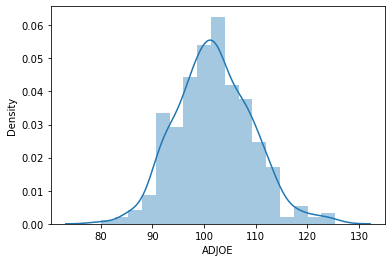

In [8]:
sns.distplot(ds['ADJOE'])

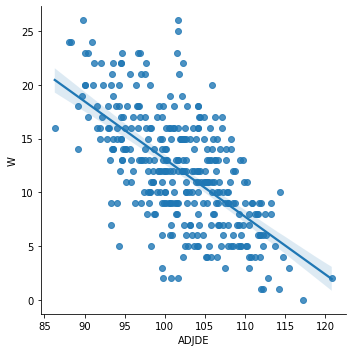

In [9]:
sns.lmplot(x='ADJDE', y='W', data=ds)

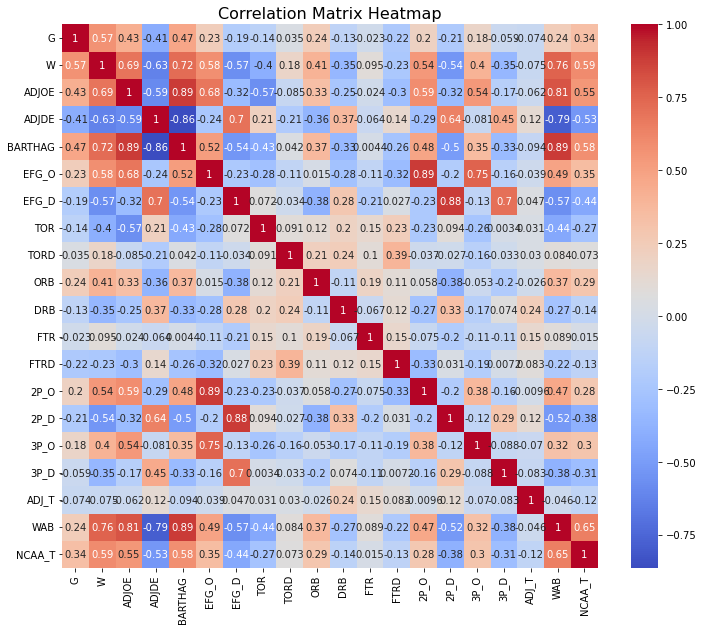

In [11]:
corr_matrix = ds.corr()

# Create a larger figure with a bigger heatmap
fig, ax = plt.subplots(figsize=(12,10))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, ax=ax)

# Add a title and adjust the position of the y-axis label
ax.set_title('Correlation Matrix Heatmap', fontsize=16)
plt.yticks(rotation=0)
plt.show()

## Create independent and dependent variables to predict (exp #1)

In [12]:
ds.columns

Index(['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
       'ADJ_T', 'WAB', 'NCAA_T'],
      dtype='object')

In [13]:
X=ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
       'ADJ_T', 'WAB']]
y=ds[['NCAA_T']]

In [14]:
# getting dummies
X=pd.get_dummies(ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
       'ADJ_T', 'WAB']],
                drop_first=True)

## Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.3,
                                                 random_state=20)

## Training the Logistic Regression model 

In [16]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(max_iter=10000000)
Classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=10000000)

## Confusion matrix, Confusion matrix display and classification report

In [17]:
y_pred=Classifier.predict(X_test.values)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[81  5]
 [ 3 16]]


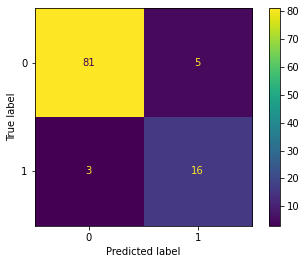

In [19]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=Classifier.classes_)
disp.plot()
plt.show()

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        86
           1       0.76      0.84      0.80        19

    accuracy                           0.92       105
   macro avg       0.86      0.89      0.88       105
weighted avg       0.93      0.92      0.93       105



## exp #2 (same steps as exp with test size changed)

In [21]:
X=ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
       'ADJ_T', 'WAB']]
y=ds[['NCAA_T']]

In [22]:
X=pd.get_dummies(ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
       'ADJ_T', 'WAB']],
                drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.2,
                                                 random_state=20)

In [24]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(max_iter=10000000)
Classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=10000000)

In [25]:
y_pred=Classifier.predict(X_test.values)

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[53  7]
 [ 1  9]]


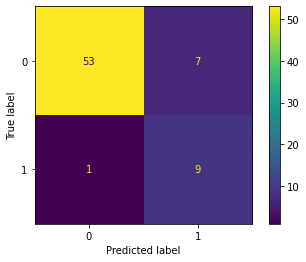

In [27]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=Classifier.classes_)
disp.plot()
plt.show()

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93        60
           1       0.56      0.90      0.69        10

    accuracy                           0.89        70
   macro avg       0.77      0.89      0.81        70
weighted avg       0.92      0.89      0.90        70



## Exp #3 (same as above except ADJ_T was removed and test size 30%)

In [29]:
X=ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
        'WAB']]
y=ds[['NCAA_T']]

In [30]:
X=pd.get_dummies(ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
        'WAB']], drop_first=True)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.3,
                                                 random_state=20)

In [32]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(max_iter=10000000)
Classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=10000000)

In [33]:
y_pred=Classifier.predict(X_test.values)

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[81  5]
 [ 4 15]]


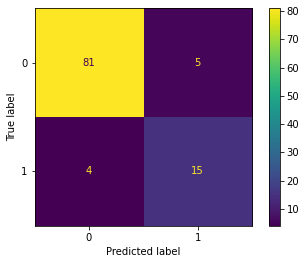

In [35]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=Classifier.classes_)
disp.plot()
plt.show()

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95        86
           1       0.75      0.79      0.77        19

    accuracy                           0.91       105
   macro avg       0.85      0.87      0.86       105
weighted avg       0.92      0.91      0.92       105



## exp #4

In [37]:
X=ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
        'WAB']]
y=ds[['NCAA_T']]

In [38]:
X=pd.get_dummies(ds[['CONF', 'G', 'W', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D',
        'WAB']], drop_first=True)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.2,
                                                 random_state=20)

In [40]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(max_iter=10000000)
Classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=10000000)

In [41]:
y_pred=Classifier.predict(X_test.values)

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[54  6]
 [ 2  8]]


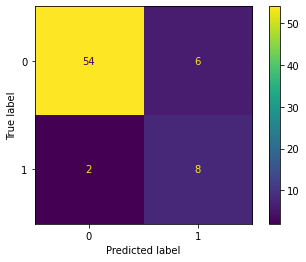

In [43]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=Classifier.classes_)
disp.plot()
plt.show()

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93        60
           1       0.57      0.80      0.67        10

    accuracy                           0.89        70
   macro avg       0.77      0.85      0.80        70
weighted avg       0.91      0.89      0.89        70



## exp #5 (added ADJ_T column back and removed G and W columns so this model could be ran on teams before their seasons are over. Also put test size to 30%)

In [45]:
X=ds[['CONF', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
        'WAB']]
y=ds[['NCAA_T']]

In [46]:
X=pd.get_dummies(ds[['CONF', 'ADJOE', 'ADJDE', 'BARTHAG', 'EFG_O', 'EFG_D', 'TOR',
       'TORD', 'ORB', 'DRB', 'FTR', 'FTRD', '2P_O', '2P_D', '3P_O', '3P_D', 'ADJ_T',
        'WAB']], drop_first=True)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.3,
                                                 random_state=20)

In [48]:
from sklearn.linear_model import LogisticRegression
Classifier=LogisticRegression(max_iter=10000000)
Classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=10000000)

In [49]:
y_pred=Classifier.predict(X_test.values)

In [50]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[80  6]
 [ 3 16]]


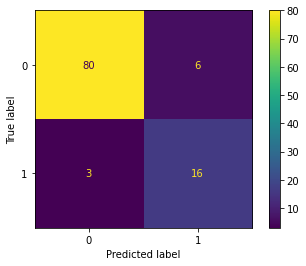

In [51]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=Classifier.classes_)
disp.plot()
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        86
           1       0.73      0.84      0.78        19

    accuracy                           0.91       105
   macro avg       0.85      0.89      0.86       105
weighted avg       0.92      0.91      0.92       105

